# Sarcasm Detection Project

First of all, I need to upload the dataset.  
The dataset is given as JSON file.

## Import

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

%run ../scripts/save_utils.py

## Data upload

In [69]:
df = pd.read_json('../data/Sarcasm_Headlines_Dataset_v2.json', lines=True)

## Overall Dataset Info

Shape:

In [70]:
print('number of features: ', df.shape[-1])
print('number of samples : ', df.shape[0])

number of features:  3
number of samples :  28619


Features and their data type:

In [71]:
print(df.dtypes)

is_sarcastic     int64
headline        object
article_link    object
dtype: object


Thus we have 3 features: text of the headline and its label, as well as the link to the website.  
  
Let's look at first several samples:

In [72]:
print(df.head())

   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...  


## Exploratory Data Analysis (EDA)

### Class distribution

In [73]:
sarcasm_distribution = df['is_sarcastic'].value_counts()
print(sarcasm_distribution)

is_sarcastic
0    14985
1    13634
Name: count, dtype: int64


So the dataset has 2 distincts classes:
- 0 - *not sarcastic*
- 1 - *sarcastic*  
  
Let's now take a look at their distribution:

/var/folders/qz/3kcb9rx96w59f3n6xcwd21fw0000gn/T/ipykernel_67217/2059373886.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


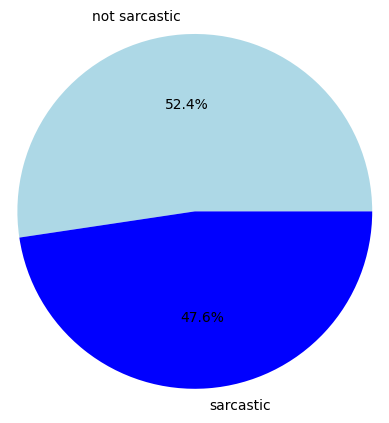

In [74]:
fig, ax = plt.subplots()
ax.pie(sarcasm_distribution, labels=['not sarcastic', 'sarcastic'], autopct='%1.1f%%', colors=['lightblue', 'blue'], radius=1.2)
fig.show();

The distribution seems to look great, although there is a minor difference between the two classes.  
  
It's hard to say at this point if the slight imbalanceness is going to affect model's performance. So We leave it as is for now.

### Duplicates

Let's now check if the dataset has duplicates:

In [75]:
print('number of duplicates: ', df.duplicated().sum())

number of duplicates:  2


Let's look at them closer:

In [76]:
display(df[df.duplicated() == True])

,is_sarcastic,headline,article_link
18572,0,hillary clinton vs. herself,https://www.huffingtonpost.comhttp://nymag.com...
25743,1,nation not sure how many ex-trump staffers it ...,https://politics.theonion.com/nation-not-sure-...


They seem to be completely different, thus we let them be.

### Sequence length

Let's take a closer look at the given text sequences:

In [77]:
headline_length = df['headline'].str.len()
display(headline_length.describe())

count    28619.000000
mean        62.308571
std         20.726483
min          7.000000
25%         49.000000
50%         62.000000
75%         75.000000
max        926.000000
Name: headline, dtype: float64

For the sake of curiosity, let's look at the shortest and the longest headline:

In [78]:
shortest = df['headline'].loc[df['headline'].str.len().idxmin()]
print('smallest headline: ', shortest, '\n')
longest = df['headline'].loc[df['headline'].str.len().idxmax()]
print('longest headline: ', longest)

smallest headline:  bye bye 

longest headline:  hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to lazy susan, which spins until it pushes d battery down incline plane, tipping over salt shaker to season omelet


Let's now look at the boxplot of headlines length:

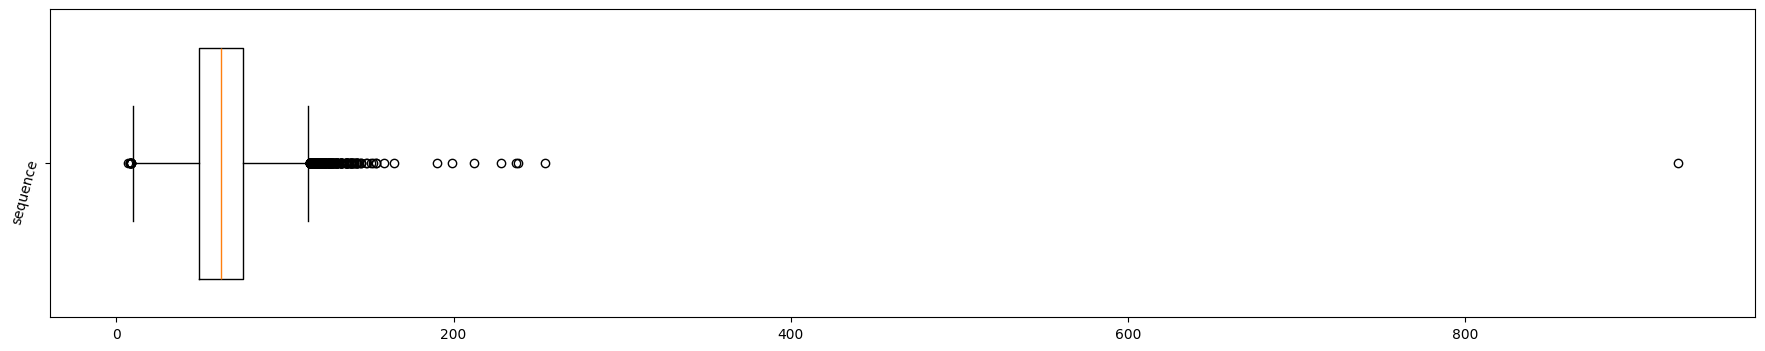

In [79]:
plt.figure(figsize=(22, 4))
plt.boxplot(headline_length, tick_labels=['sequence'], vert=False)
plt.ylim(0.9, 1.1)
plt.yticks(rotation=75)
plt.show();

Let's take a closer look at the left part: (*omitting an extreme value of 926*)

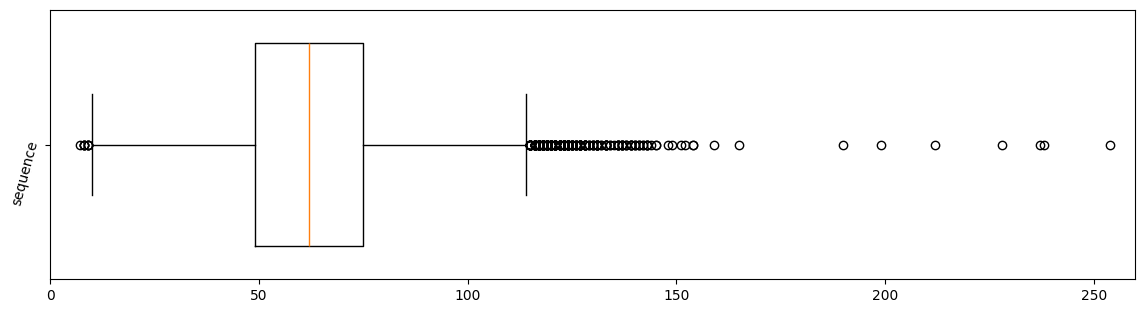

In [80]:
plt.figure(figsize=(14, 3.5))
plt.boxplot(headline_length, tick_labels=['sequence'], vert=False)
plt.ylim(0.9, 1.1)
plt.yticks(rotation=75)
plt.xlim(0, 260)
plt.show();

## Dataset save

To be able to use the same file conveniently in other notebooks I will save it and then load whenever and wherever I need.  
To do this I will use *Pickle* module:

In [81]:
save_data('../save_files/df.pkl', df)

All variables have been successfully saved to ../save_files/df.pkl.


## Conclusion

- As this dataset has 2 distinct classes, this is a binary classification problem.  
  
- Goal: develop a model that can accurately determine whether a given news headline is sarcastic or not.  

- Evaluation metric: I've decided to use *Accuracy* supplemented by *F1 Score* to evaluate models in the following.